In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/wine.csv', index_col=0)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,0,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


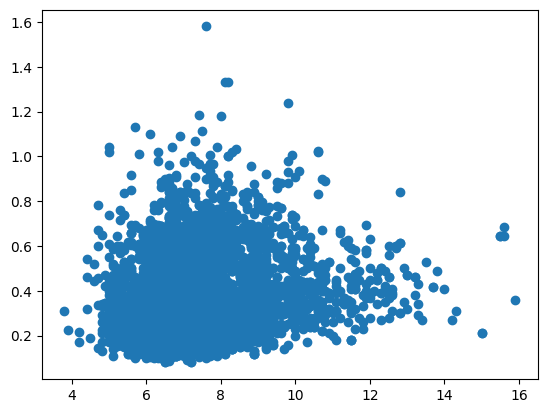

In [33]:
plt.scatter(df['fixed acidity'], df['volatile acidity'])

In [34]:
# k-means

from sklearn.cluster import KMeans

temp = df[['fixed acidity','volatile acidity']]

k = 3
model = KMeans(n_clusters = k)
# model.fit(df[['fixed acidity','volatile acidity']]) #locate centroids
temp['cluster'] = model.fit_predict(temp) #locate centroids and cluster

temp

,fixed acidity,volatile acidity,cluster
0,7.0,0.270,0
1,6.3,0.300,1
2,8.1,0.280,0
3,7.2,0.230,0
4,7.2,0.230,0
...,...,...,...
6492,6.2,0.600,1
6493,5.9,0.550,1
6494,6.3,0.510,1
6495,5.9,0.645,1


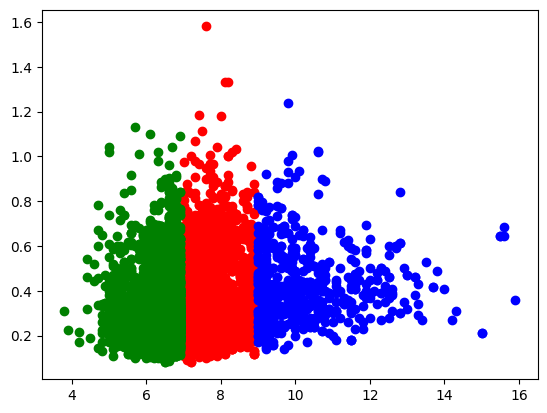

In [35]:
color = ['red','green','blue']
for i in range(k):
    t = temp[temp['cluster']==i]
    plt.scatter(t['fixed acidity'], t['volatile acidity'],color = color[i])

#without scaling y is downlooked, x is 10 times greater then y -> scalingg is required

In [38]:
from sklearn.preprocessing import MinMaxScaler
 
temp = df[["fixed acidity", "volatile acidity"]]
 
scaler = MinMaxScaler()
 
col = temp.columns
temp = pd.DataFrame(scaler.fit_transform(temp), columns = col)


model = KMeans(n_clusters = k)
temp['cluster'] = model.fit_predict(temp)
temp
 

,fixed acidity,volatile acidity,cluster
0,0.264463,0.126667,1
1,0.206612,0.146667,1
2,0.355372,0.133333,1
3,0.280992,0.100000,1
4,0.280992,0.100000,1
...,...,...,...
6492,0.198347,0.346667,0
6493,0.173554,0.313333,0
6494,0.206612,0.286667,0
6495,0.173554,0.376667,0


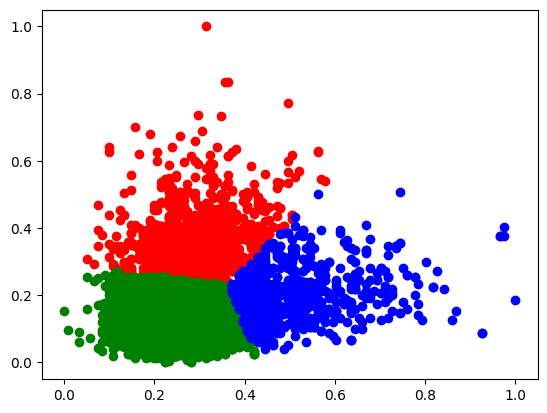

In [39]:
color = ['red','green','blue']
for i in range(k):
    t = temp[temp['cluster']==i]
    plt.scatter(t['fixed acidity'], t['volatile acidity'],color = color[i])

In [42]:
from sklearn.metrics import silhouette_score
silhouette_score(temp[['fixed acidity','volatile acidity']], temp['cluster'])

0.527654124453881

100%|█████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.87it/s]


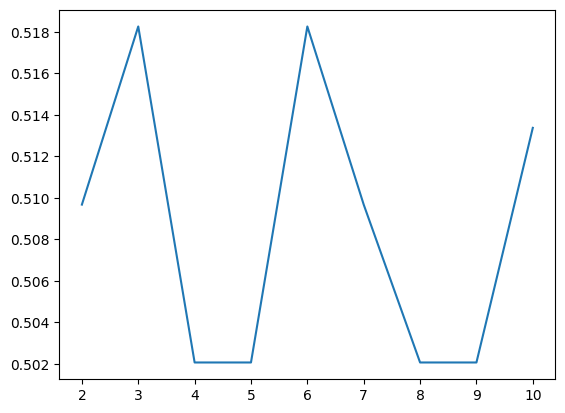

In [47]:
from tqdm import tqdm

temp = df[["fixed acidity", "volatile acidity"]]
scores = []
for i in tqdm(range(2,11)):
    model = KMeans(n_clusters = k)
    prediction = model.fit_predict(temp)
    scores.append(silhouette_score(temp, prediction))

plt.plot(range(2,11),scores)

In [67]:
#Density Based Scan
df = pd.read_csv('./data/wine.csv', index_col=0)

temp = df[["fixed acidity", "volatile acidity"]]
 
scaler = MinMaxScaler()
 
col = temp.columns
temp = pd.DataFrame(scaler.fit_transform(temp), columns = col)


from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
model = DBSCAN(eps = 0.05, min_samples = 4) #higher eps contaminate further data
temp['cluster'] = model.fit_predict(temp)
temp['cluster']

# pd.Series(prediction).value_counts()

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: cluster, Length: 6497, dtype: int64

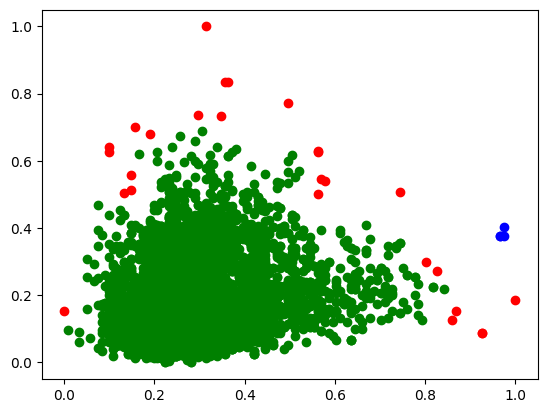

In [68]:
color = ['red','green','blue']
for i in range(k):
    t = temp[temp['cluster']==i-1]
    plt.scatter(t['fixed acidity'], t['volatile acidity'],color = color[i])

In [72]:
#AgglomerativeClustering
df = pd.read_csv('./data/wine.csv', index_col=0)

temp = df[["fixed acidity", "volatile acidity"]]
 
scaler = MinMaxScaler()
 
col = temp.columns
temp = pd.DataFrame(scaler.fit_transform(temp), columns = col)


k=3   
model = AgglomerativeClustering(n_clusters = k)
temp['cluster'] = model.fit_predict(temp)
temp['cluster']

0       1
1       1
2       1
3       1
4       1
       ..
6492    2
6493    2
6494    2
6495    2
6496    1
Name: cluster, Length: 6497, dtype: int64

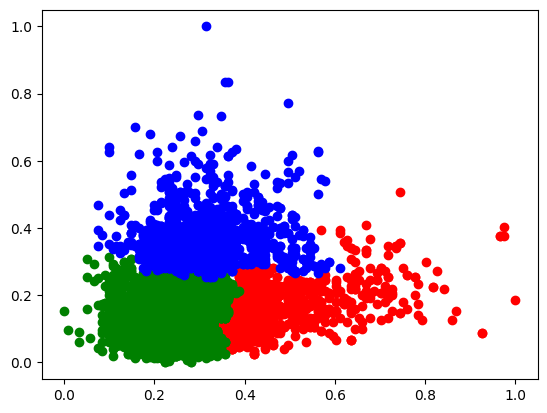

In [73]:
color = ['red','green','blue']
for i in range(k):
    t = temp[temp['cluster']==i]
    plt.scatter(t['fixed acidity'], t['volatile acidity'],color = color[i])

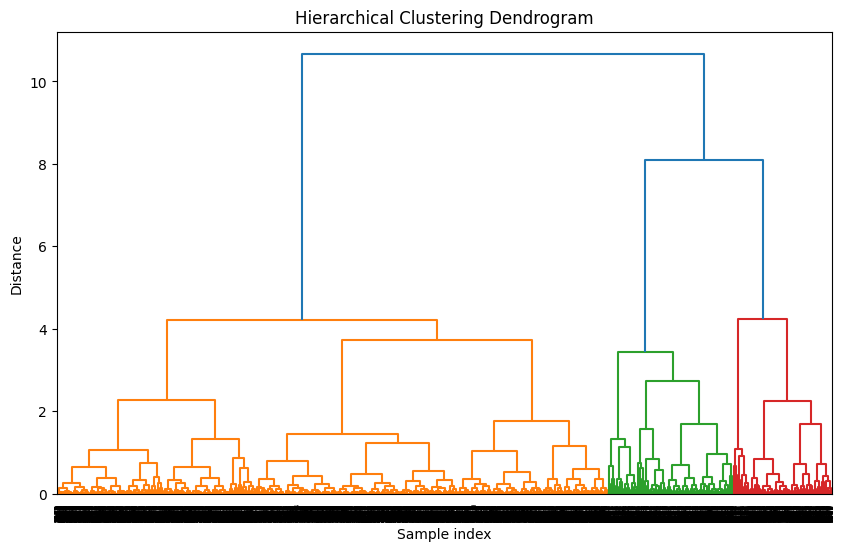

In [76]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import AgglomerativeClustering

import numpy as np

import pandas as pd
 
df = pd.read_csv("./data/wine.csv", index_col = 0)
 
temp = df[["fixed acidity", "volatile acidity"]]
 
scaler = MinMaxScaler()
 
col = temp.columns

temp = pd.DataFrame(scaler.fit_transform(temp), columns = col)
 
# 1️⃣ 덴드로그램용 모델 (전체 트리 생성)

model = AgglomerativeClustering(

    distance_threshold=0, 

    n_clusters=None

)
 
model = model.fit(temp)
 
# 2️⃣ linkage matrix 생성 함수

def plot_dendrogram(model, **kwargs):

    # 각 노드에 포함된 샘플 수 계산

    counts = np.zeros(model.children_.shape[0])

    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):

        current_count = 0

        for child_idx in merge:

            if child_idx < n_samples:

                current_count += 1

            else:

                current_count += counts[child_idx - n_samples]

        counts[i] = current_count
 
    linkage_matrix = np.column_stack(

        [model.children_, model.distances_, counts]

    ).astype(float)
 
    dendrogram(linkage_matrix, **kwargs)
 
# 3️⃣ 덴드로그램 출력

plt.figure(figsize=(10, 6))

plot_dendrogram(model)

plt.title("Hierarchical Clustering Dendrogram")

plt.xlabel("Sample index")

plt.ylabel("Distance")

plt.show()
 